In [50]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

In [51]:
dataset_names = ['LiGen', 'Query26', 'Stereomatch']

In [52]:
files = list(glob('./../results/prova_KG/*.json'))
sorted(files)

['./../results/prova_KG/Branin_2023-10-30_1226.json',
 './../results/prova_KG/Branin_2023-10-30_1238.json',
 './../results/prova_KG/Branin_2023-10-30_1306.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1342.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1352.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1401.json',
 './../results/prova_KG/Levy4_2023-10-30_1506.json',
 './../results/prova_KG/Levy4_2023-10-30_1540.json',
 './../results/prova_KG/Levy4_2023-10-30_1549.json',
 './../results/prova_KG/Levy4_2023-11-02_1024.json',
 './../results/prova_KG/LiGen_2023-10-12_1823.json',
 './../results/prova_KG/LiGen_2023-10-31_1502.json',
 './../results/prova_KG/LiGen_2023-10-31_1505.json',
 './../results/prova_KG/LiGen_2023-10-31_1507.json',
 './../results/prova_KG/LiGen_2023-10-31_1508.json',
 './../results/prova_KG/LiGen_2023-10-31_1511.json',
 './../results/prova_KG/LiGen_2023-10-31_1513.json',
 './../results/prova_KG/LiGen_2023-10-31_1515.json',
 './../results/prova_KG/LiGen_2

In [53]:
dfs = {}
for filename in files:
    df = pd.read_json(filename, orient='records')
    # df = df.set_index('iteration')
    if 'prova_KG' in filename:
        df['algorithm'] = 'q-KG'
    else:
        df['algorithm'] = 'MALIBOO'
    df['filename'] = filename.rsplit('/', 1)[-1].replace('.json', '')
    for dataset_name in dataset_names:
        if dataset_name.upper() in filename.upper():
            dfs.setdefault(dataset_name.lower(), []).append(df)
            break

In [54]:
def select_data(dfs, selected_dataset):
    selected_dfs = {}
    for df in dfs[selected_dataset.lower()]:
        if len(df) == 1:
            # print(df.iloc[0])
            continue
        min_cost = df['computed_cost'].min()
        best_row = df.sort_values(['computed_cost', 'n_evaluations']).iloc[0]
        # print(best_row)
        algo = best_row['algorithm']
        if algo == 'q-KG':
            q = best_row['q']
            key = f'{algo}'.replace('q', str(q))
        else:
            mq = best_row['filename'][-1]
            key = f'EI mq{mq}'
        data_dict = {'data': df, 'computed_cost': best_row['computed_cost'], 'n_evaluations': best_row['n_evaluations']}
        selected_dfs.setdefault(key, data_dict)
        if (selected_dfs[key]['computed_cost'] > best_row['computed_cost'] 
            or (selected_dfs[key]['computed_cost'] == best_row['computed_cost'] and selected_dfs[key]['n_evaluations'] >= best_row['n_evaluations'])):
            print('Better!', key)
            print(min_cost)
            selected_dfs[key] = data_dict
    return selected_dfs

In [55]:
result_list = []
for dataset_name in dataset_names:
    selected_dfs = select_data(dfs, dataset_name)
    known_minimum = None    
    for key, info in selected_dfs.items():
        df = info['data']
        last_row = df.iloc[-1]
        if known_minimum is None:
            known_minimum = info['computed_cost'] - last_row['error']
            result_list.append({
                'Dataset': dataset_name,
                'Algorithm': 'Known Minimum',
                '# Evaluations': '-',
                'Cost': known_minimum,
                'Error': 0,
                'Error Ratio': 0
        })
        result_list.append({
            'Dataset': dataset_name,
            'Algorithm': key,
            '# Evaluations': info['n_evaluations'],
            'Cost': info['computed_cost'],
            'Error': last_row['error'],
            'Error Ratio': last_row['error'] / known_minimum
        })
    
    # result_df = pd.DataFrame([{'Algorithm': key, '# Evaluations': ,'Cost': df['computed_cost']}
    #                           ])
result_df = pd.DataFrame(result_list)

Better! 4-KG
995.585522462
Better! 3-KG
728.04426048
Better! 5-KG
1246.039676496
Better! 4-KG
991.245993536
Better! 7-KG
826.223434
Better! 5-KG
826.223434
Better! 8-KG
826.223434
Better! 7-KG
826.223434
Better! 3-KG
683682
Better! 5-KG
683682
Better! 2-KG
683682
Better! 4-KG
683682
Better! 4-KG
37218
Better! 5-KG
41090
Better! 3-KG
36791
Better! 2-KG
37785


In [56]:
mask = result_df['Dataset'] == 'Query26'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]
result_df.loc[9, 'Cost'] = 683682.0
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]


,Algorithm,# Evaluations,Cost,Error,Error Ratio
6,Known Minimum,-,654441.0,0.0,0.000000
7,3-KG,48,683682.0,29241.0,0.044681
8,5-KG,12,683682.0,0.0,0.000000
9,2-KG,24,683682.0,8154.0,0.012459
10,4-KG,22,683682.0,30771.0,0.047019


In [57]:
mask = result_df['Dataset'] == 'Stereomatch'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]

,Algorithm,# Evaluations,Cost,Error,Error Ratio
11,Known Minimum,-,36122.0,0.0,0.000000
12,4-KG,46,37218.0,1096.0,0.030342
13,5-KG,47,41090.0,4299.0,0.119013
14,3-KG,45,36791.0,0.0,0.000000
15,2-KG,58,37785.0,994.0,0.027518


In [58]:
mask = result_df['Dataset'] == 'LiGen'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]

,Algorithm,# Evaluations,Cost,Error,Error Ratio
0,Known Minimum,-,667.544416,0.000000,0.000000
1,4-KG,32,991.245994,323.701578,0.484914
2,3-KG,42,728.044260,60.499844,0.090630
3,5-KG,12,826.223434,158.679018,0.237706
4,7-KG,14,826.223434,158.679018,0.237706
5,8-KG,16,826.223434,158.679018,0.237706


In [59]:
def plot(selected_dfs, selected_dataset):
    plt.figure(figsize=(12, 5))
    for key, data_dict in selected_dfs.items():
        df = data_dict['data']
        if len(df) == 1:
            print(df.iloc[0])

        plt.plot(df['n_evaluations'], df['error_ratio'], 
                 label=key, 
                 marker='+', 
                 linestyle=':'
                )
    plt.legend()
    plt.xlabel('# evaluations')
    plt.ylabel('Error_ratio')
    plt.title(f'{selected_dataset}')

In [60]:
maliboo_0 = pd.read_csv('./../results/maliboo_runs/Query26q0.csv')
ste_error_ratio0 = maliboo_0['error_ratio'][2:]
maliboo_5 = pd.read_csv('./../results/maliboo_runs/Query26q5.csv')
ste_error_ratio5 = maliboo_5['error_ratio'][2:]

Better! 3-KG
683682
Better! 5-KG
683682
Better! 2-KG
683682
Better! 4-KG
683682


(-0.3, 2.5)

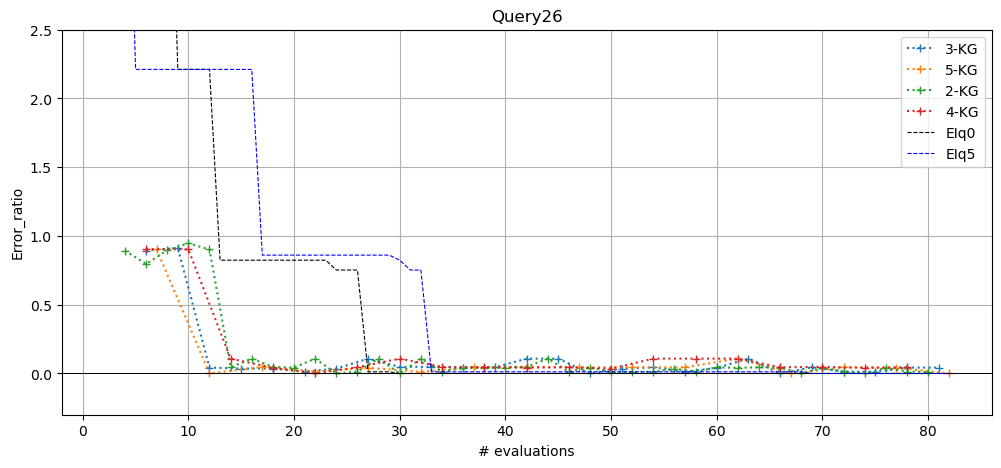

In [61]:
selected_dfs = select_data(dfs, 'Query26')
plot(selected_dfs, 'Query26')
plt.axhline(y=0, color='k', linestyle='-',linewidth=0.7)
plt.plot(ste_error_ratio0, color='k', linestyle='--', linewidth=0.8, label='EIq0')
plt.plot(ste_error_ratio5, color='b', linestyle='--', linewidth=0.8, label='EIq5')
plt.grid(True)
plt.legend()
plt.ylim(-0.3,2.5)


In [62]:
maliboo_ste0 = pd.read_csv('./../results/maliboo_runs/StereoMatchq0.csv')
ste_error_ratio0 = maliboo_ste0['error_ratio'][2:]
maliboo_ste5 = pd.read_csv('./../results/maliboo_runs/Query26q5.csv')
ste_error_ratio5 = maliboo_ste5['error_ratio'][2:]

Better! 4-KG
37218
Better! 5-KG
41090
Better! 3-KG
36791
Better! 2-KG
37785


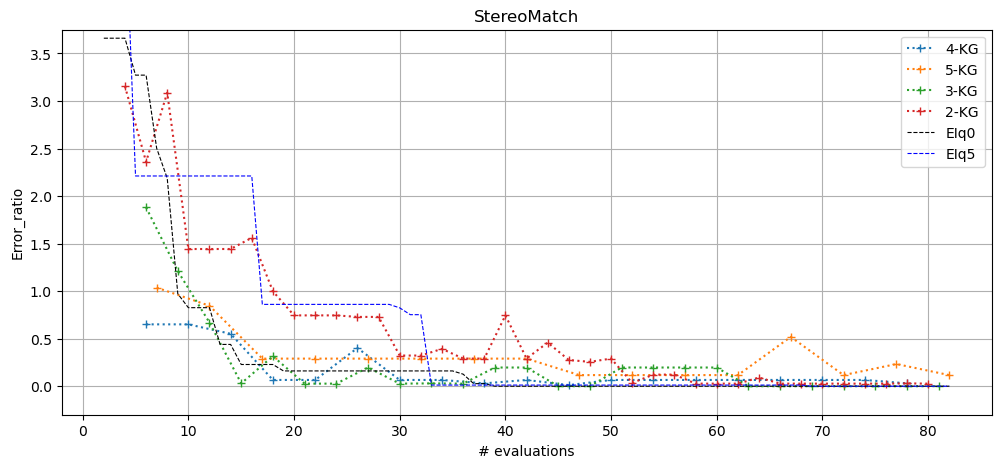

In [63]:
selected_dfs = select_data(dfs, 'StereoMatch')
plot(selected_dfs, 'StereoMatch')
plt.plot(ste_error_ratio0, color='k', linestyle='--', linewidth=0.8, label='EIq0')
plt.plot(ste_error_ratio5, color='b', linestyle='--', linewidth=0.8, label='EIq5')
plt.grid(True)
plt.ylim(-0.3,3.75)
plt.legend()


In [66]:
maliboo_ligen0 = pd.read_csv('./../results/maliboo_runs/LiGenq0.csv')
ligen_error_ratio0 = maliboo_ligen0['error_ratio'][1:]
maliboo_ligen5 = pd.read_csv('./../results/maliboo_runs/LiGen5.csv')
ligen_error_ratio5 = maliboo_ligen5['error_ratio']

Better! 4-KG
995.585522462
Better! 3-KG
728.04426048
Better! 5-KG
1246.039676496
Better! 4-KG
991.245993536
Better! 7-KG
826.223434
Better! 5-KG
826.223434
Better! 8-KG
826.223434
Better! 7-KG
826.223434


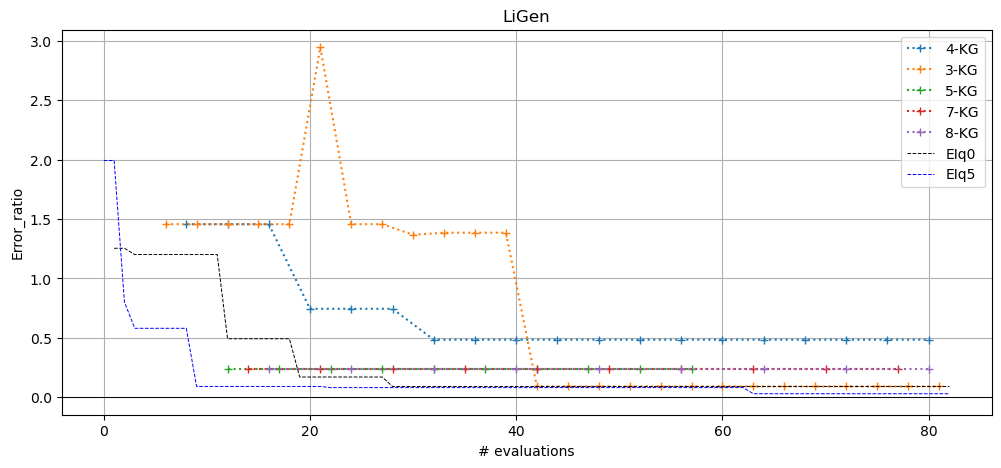

In [71]:
selected_dfs = select_data(dfs, 'LiGen')
plot(selected_dfs, 'LiGen')
plt.axhline(y=0, color='k', linestyle='-',linewidth=0.7)
plt.plot(ligen_error_ratio0, color='k', linestyle='--', linewidth=0.7, label='EIq0')
plt.plot(ligen_error_ratio5, color='b', linestyle='--', linewidth=0.7, label='EIq5')
plt.grid()


plt.legend()